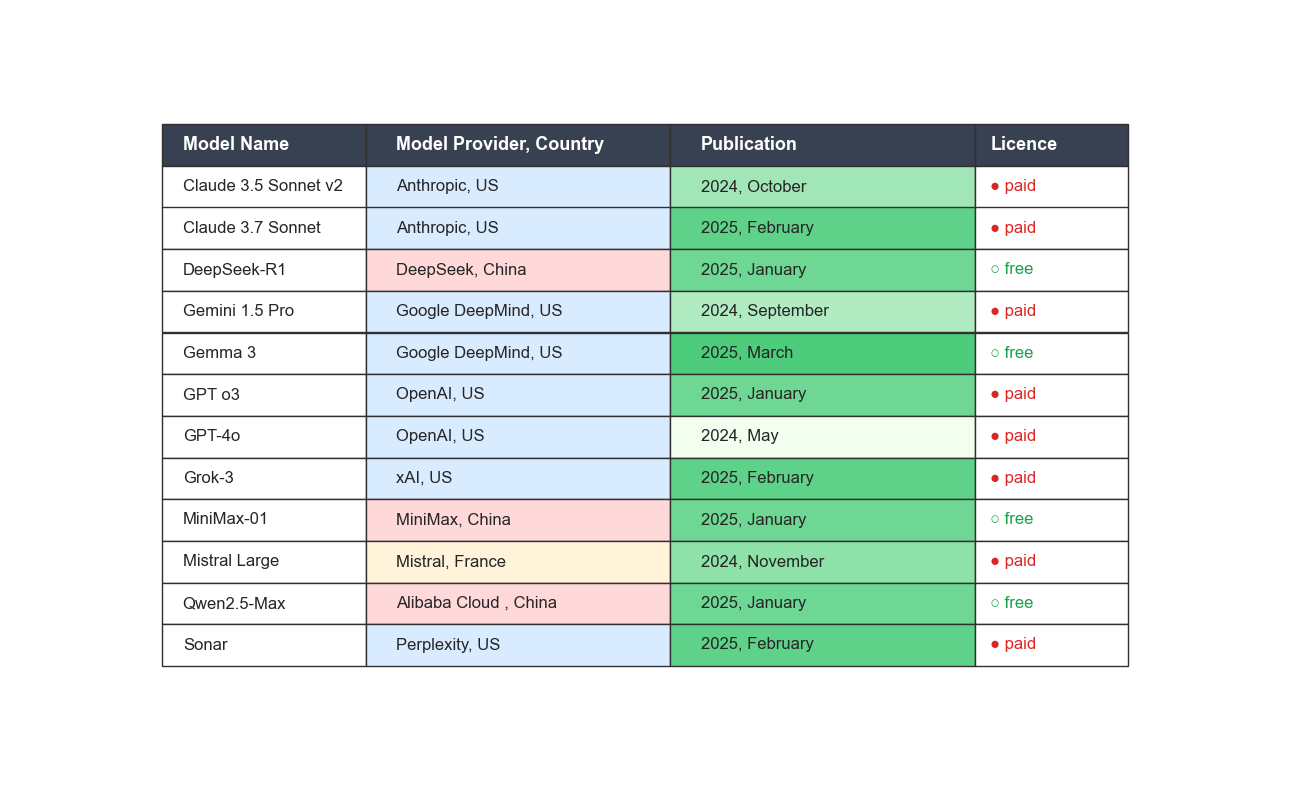

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/models.csv')

month_to_num = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

country_colors = {
    'US': '#d9ebff',
    'China': '#ffd9d9',
    'France': '#fff3d9'
}

def get_color_scale(value, min_val, max_val, reverse=False):
    start = to_rgb('#f2ffef')
    end = to_rgb('#4dcd7c')

    if max_val == min_val:
        norm = 0.5
    else:
        norm = (value - min_val) / (max_val - min_val)

    if reverse:
        norm = 1 - norm

    r = start[0] + norm * (end[0] - start[0])
    g = start[1] + norm * (end[1] - start[1])
    b = start[2] + norm * (end[2] - start[2])
    return (r, g, b)

df['date_val'] = (df['year'] - 2024) * 12 + df['month'].map(month_to_num)
date_min, date_max = df['date_val'].min(), df['date_val'].max()
df['date_norm'] = (df['date_val'] - date_min) / (date_max - date_min)

table_data = []
for _, row in df.iterrows():
    icon = '● ' if row['licence'] == 'paid' else '○ '
    table_data.append([
        row['model_name'],
        f"{row['model_provider']}, {row['country']}",
        f"{row['year']}, {row['month']}",
        f"{icon}{row['licence']}"
    ])

fig, ax = plt.subplots(figsize=(13, 8))
ax.axis('off')

columns = ['Model Name', 'Model Provider, Country', 'Publication', 'Licence']

table = ax.table(
    cellText=table_data,
    colLabels=columns,
    cellLoc='left',
    loc='center',
    colWidths=[0.20, 0.30, 0.30, 0.15]
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.8, 2)

for key, cell in table.get_celld().items():
    cell.set_text_props(fontfamily='sans-serif')
    cell.set_edgecolor('#312f2f')

    row, col = key

    if row == 0:
        cell.set_facecolor('#374151')
        cell.set_text_props(color='white', fontweight='bold', fontfamily='sans-serif', fontsize=13, ha='left')
    else:
        if col == 1:
            country = df.iloc[row-1]['country']
            cell.set_facecolor(country_colors.get(country, 'white'))

        elif col == 2:
            norm_val = df.iloc[row-1]['date_norm']

            cell.set_facecolor(get_color_scale(norm_val, 0, 1))

        elif col == 3:
            if df.iloc[row-1]['licence'] == 'paid':
                cell.set_text_props(color='#DC2626')
            else:
                cell.set_text_props(color='#16A34A')

plt.tight_layout()
plt.savefig('models_table.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

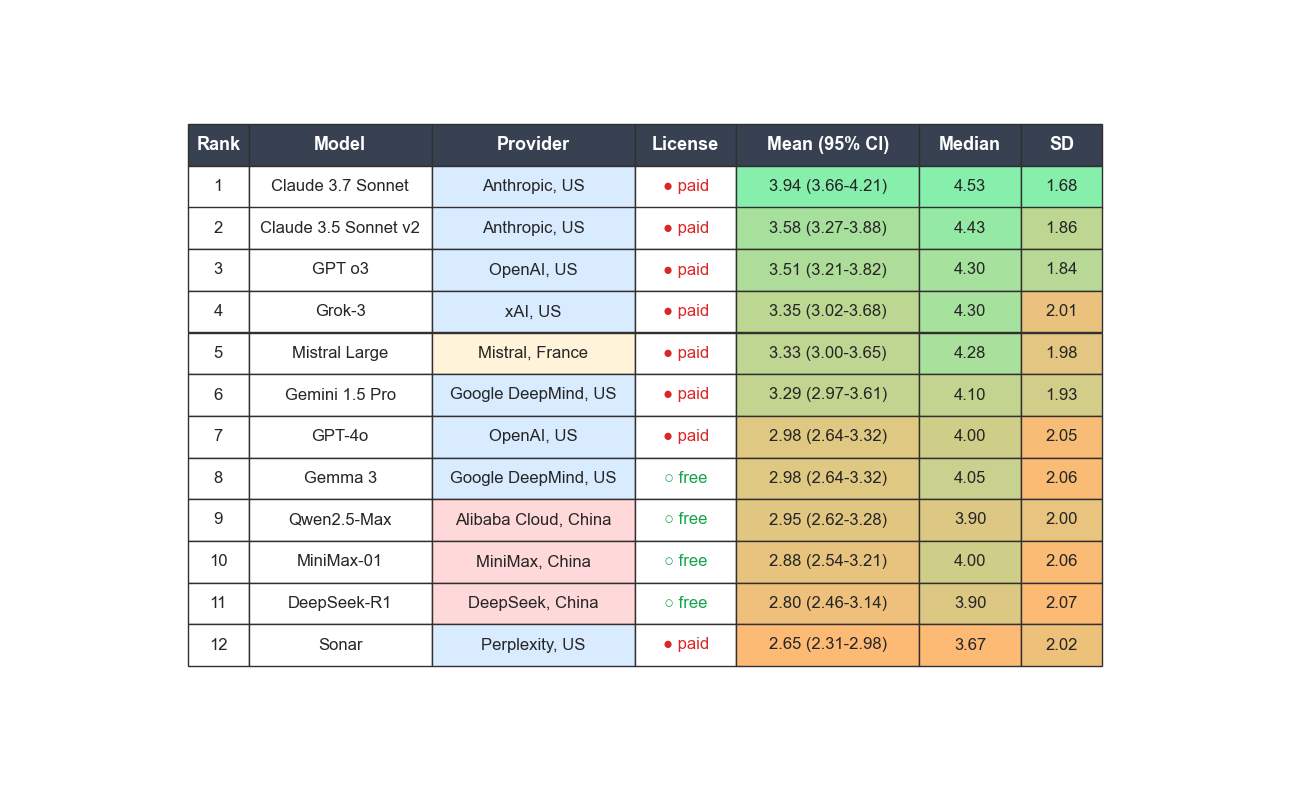

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np

# Dane
data = {
    'rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'model': ['Claude 3.7 Sonnet', 'Claude 3.5 Sonnet v2', 'GPT o3', 'Grok-3', 'Mistral Large',
              'Gemini 1.5 Pro', 'GPT-4o', 'Gemma 3', 'Qwen2.5-Max', 'MiniMax-01', 'DeepSeek-R1', 'Sonar'],
    'provider': ['Anthropic, US', 'Anthropic, US', 'OpenAI, US', 'xAI, US', 'Mistral, France',
                 'Google DeepMind, US', 'OpenAI, US', 'Google DeepMind, US', 'Alibaba Cloud, China',
                 'MiniMax, China', 'DeepSeek, China', 'Perplexity, US'],
    'licence': ['paid', 'paid', 'paid', 'paid', 'paid', 'paid', 'paid', 'free', 'free', 'free', 'free', 'paid'],
    'mean_ci': ['3.94 (3.66-4.21)', '3.58 (3.27-3.88)', '3.51 (3.21-3.82)', '3.35 (3.02-3.68)',
                '3.33 (3.00-3.65)', '3.29 (2.97-3.61)', '2.98 (2.64-3.32)', '2.98 (2.64-3.32)',
                '2.95 (2.62-3.28)', '2.88 (2.54-3.21)', '2.80 (2.46-3.14)', '2.65 (2.31-2.98)'],
    'mean_val': [3.94, 3.58, 3.51, 3.35, 3.33, 3.29, 2.98, 2.98, 2.95, 2.88, 2.80, 2.65],
    'median': [4.53, 4.43, 4.30, 4.30, 4.28, 4.10, 4.00, 4.05, 3.90, 4.00, 3.90, 3.67],
    'sd': [1.68, 1.86, 1.84, 2.01, 1.98, 1.93, 2.05, 2.06, 2.00, 2.06, 2.07, 2.02]
}

df = pd.DataFrame(data)

US = '#d9ebff'
China = '#ffd9d9'
France = '#fff3d9'

provider_colors = {
    'Anthropic, US': US,
    'OpenAI, US': US,
    'xAI, US': US,
    'Mistral, France': France,
    'Google DeepMind, US': US,
    'Alibaba Cloud, China': China,
    'MiniMax, China': China,
    'DeepSeek, China': China,
    'Perplexity, US': US
}

def get_color_scale(value, min_val, max_val, reverse=False):
    orange = to_rgb('#FDBA74')
    green = to_rgb('#86EFAC')

    if max_val == min_val:
        norm = 0.5
    else:
        norm = (value - min_val) / (max_val - min_val)

    if reverse:
        norm = 1 - norm

    r = orange[0] + norm * (green[0] - orange[0])
    g = orange[1] + norm * (green[1] - orange[1])
    b = orange[2] + norm * (green[2] - orange[2])
    return (r, g, b)

mean_min, mean_max = df['mean_val'].min(), df['mean_val'].max()
median_min, median_max = df['median'].min(), df['median'].max()
sd_min, sd_max = df['sd'].min(), df['sd'].max()

table_data = []
for _, row in df.iterrows():
    icon = '● ' if row['licence'] == 'paid' else '○ '
    table_data.append([
        row['rank'],
        row['model'],
        row['provider'],
        f"{icon}{row['licence']}",
        row['mean_ci'],
        f"{row['median']:.2f}",
        f"{row['sd']:.2f}"
    ])

fig, ax = plt.subplots(figsize=(13, 8))
ax.axis('off')

columns = ['Rank', 'Model', 'Provider', 'License', 'Mean (95% CI)', 'Median', 'SD']

table = ax.table(
    cellText=table_data,
    colLabels=columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.06, 0.18, 0.20, 0.10, 0.18, 0.10, 0.08]
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.8, 2)

for key, cell in table.get_celld().items():
    cell.set_text_props(fontfamily='sans-serif')
    cell.set_edgecolor('#312f2f')

    row, col = key

    if row == 0:
        cell.set_facecolor('#374151')
        cell.set_text_props(color='white', fontweight='bold', fontfamily='sans-serif', fontsize=13, ha='center')
    else:
        idx = row - 1

        if col == 2:
            provider = df.iloc[idx]['provider']
            cell.set_facecolor(provider_colors.get(provider, 'white'))

        elif col == 3:
            if df.iloc[idx]['licence'] == 'paid':
                cell.set_text_props(color='#DC2626')
            else:
                cell.set_text_props(color='#16A34A')

        elif col == 4:
            val = df.iloc[idx]['mean_val']
            cell.set_facecolor(get_color_scale(val, mean_min, mean_max))

        elif col == 5:
            val = df.iloc[idx]['median']
            cell.set_facecolor(get_color_scale(val, median_min, median_max))

        elif col == 6:
            val = df.iloc[idx]['sd']
            cell.set_facecolor(get_color_scale(val, sd_min, sd_max, reverse=True))

plt.tight_layout()
plt.savefig('models_ranking.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

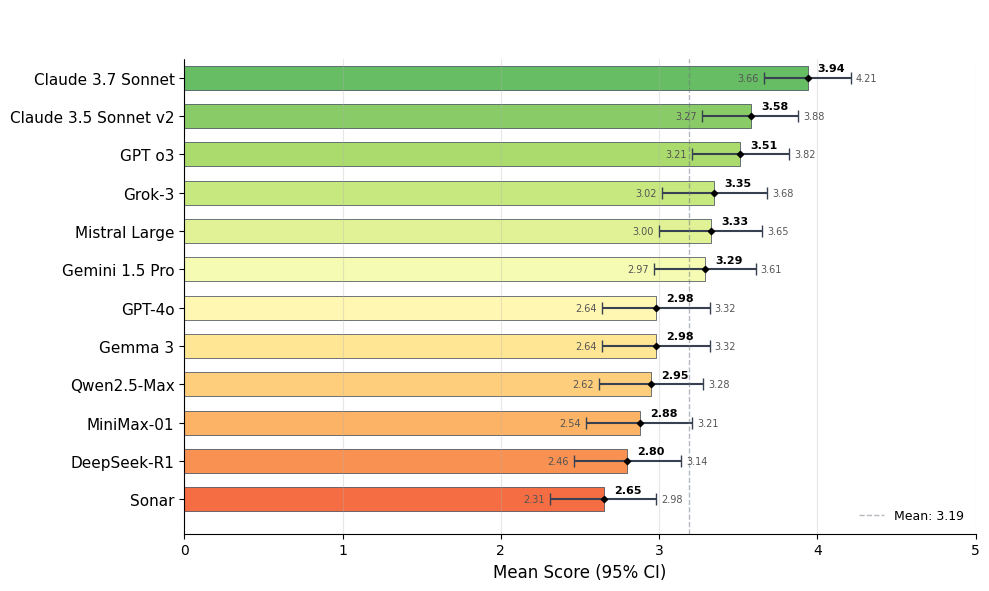

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Dane
models = ['Claude 3.7 Sonnet', 'Claude 3.5 Sonnet v2', 'GPT o3', 'Grok-3', 'Mistral Large',
          'Gemini 1.5 Pro', 'GPT-4o', 'Gemma 3', 'Qwen2.5-Max', 'MiniMax-01', 'DeepSeek-R1', 'Sonar']

mean_ci = ['3.94 (3.66-4.21)', '3.58 (3.27-3.88)', '3.51 (3.21-3.82)', '3.35 (3.02-3.68)',
           '3.33 (3.00-3.65)', '3.29 (2.97-3.61)', '2.98 (2.64-3.32)', '2.98 (2.64-3.32)',
           '2.95 (2.62-3.28)', '2.88 (2.54-3.21)', '2.80 (2.46-3.14)', '2.65 (2.31-2.98)']

# Parsowanie danych: mean, ci_low, ci_high
def parse_mean_ci(s):
    match = re.match(r'([\d.]+)\s*\(([\d.]+)-([\d.]+)\)', s)
    if match:
        return float(match.group(1)), float(match.group(2)), float(match.group(3))
    return None

parsed = [parse_mean_ci(x) for x in mean_ci]
means = [x[0] for x in parsed]
ci_low = [x[1] for x in parsed]
ci_high = [x[2] for x in parsed]

errors_low = [m - l for m, l in zip(means, ci_low)]
errors_high = [h - m for m, h in zip(means, ci_high)]
errors = [errors_low, errors_high]

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.set_facecolor('white')

y_pos = np.linspace(0, len(models)-1, len(models)) * 0.8
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(models)))[::-1]

bars = ax.barh(y_pos, means, height=0.5, xerr=errors, capsize=4, color=colors,
               edgecolor='#374151', linewidth=0.5, error_kw={'elinewidth': 1.5, 'ecolor': '#374151'})

ax.set_yticks(y_pos)
ax.set_yticklabels(models, fontfamily='sans-serif', fontsize=11)
ax.invert_yaxis()

ax.set_xlabel('Mean Score (95% CI)', fontfamily='sans-serif', fontsize=12)

from matplotlib.patches import Rectangle
rect = Rectangle(
    (-0.1, 0.97),
    1.1,
    0.1,
    transform=ax.transAxes,
    color='white',
    zorder=10,
    clip_on=False
)
ax.add_patch(rect)

for i, (bar, mean, low, high) in enumerate(zip(bars, means, ci_low, ci_high)):
    y_center = bar.get_y() + bar.get_height() / 2

    ax.scatter(mean, y_center, marker='D', color='black', s=10, zorder=2)

    ax.text(mean + 0.15, y_center - 0.1, f'{mean:.2f}', ha='center', va='bottom',
            fontfamily='sans-serif', fontsize=8, fontweight='bold')

    ax.text(low - 0.1, y_center, f'{low:.2f}', ha='center', va='center',
            fontfamily='sans-serif', fontsize=7, color='#555555')

    ax.text(high + 0.1, y_center, f'{high:.2f}', ha='center', va='center',
            fontfamily='sans-serif', fontsize=7, color='#555555')

ax.set_xlim(0, 5)
ax.axvline(x=np.mean(means), color='#6B7280', linestyle='--', linewidth=1, alpha=0.5, label=f'Mean: {np.mean(means):.2f}')
ax.legend(loc='lower right', fontsize=9, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('mean_ci_barchart.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

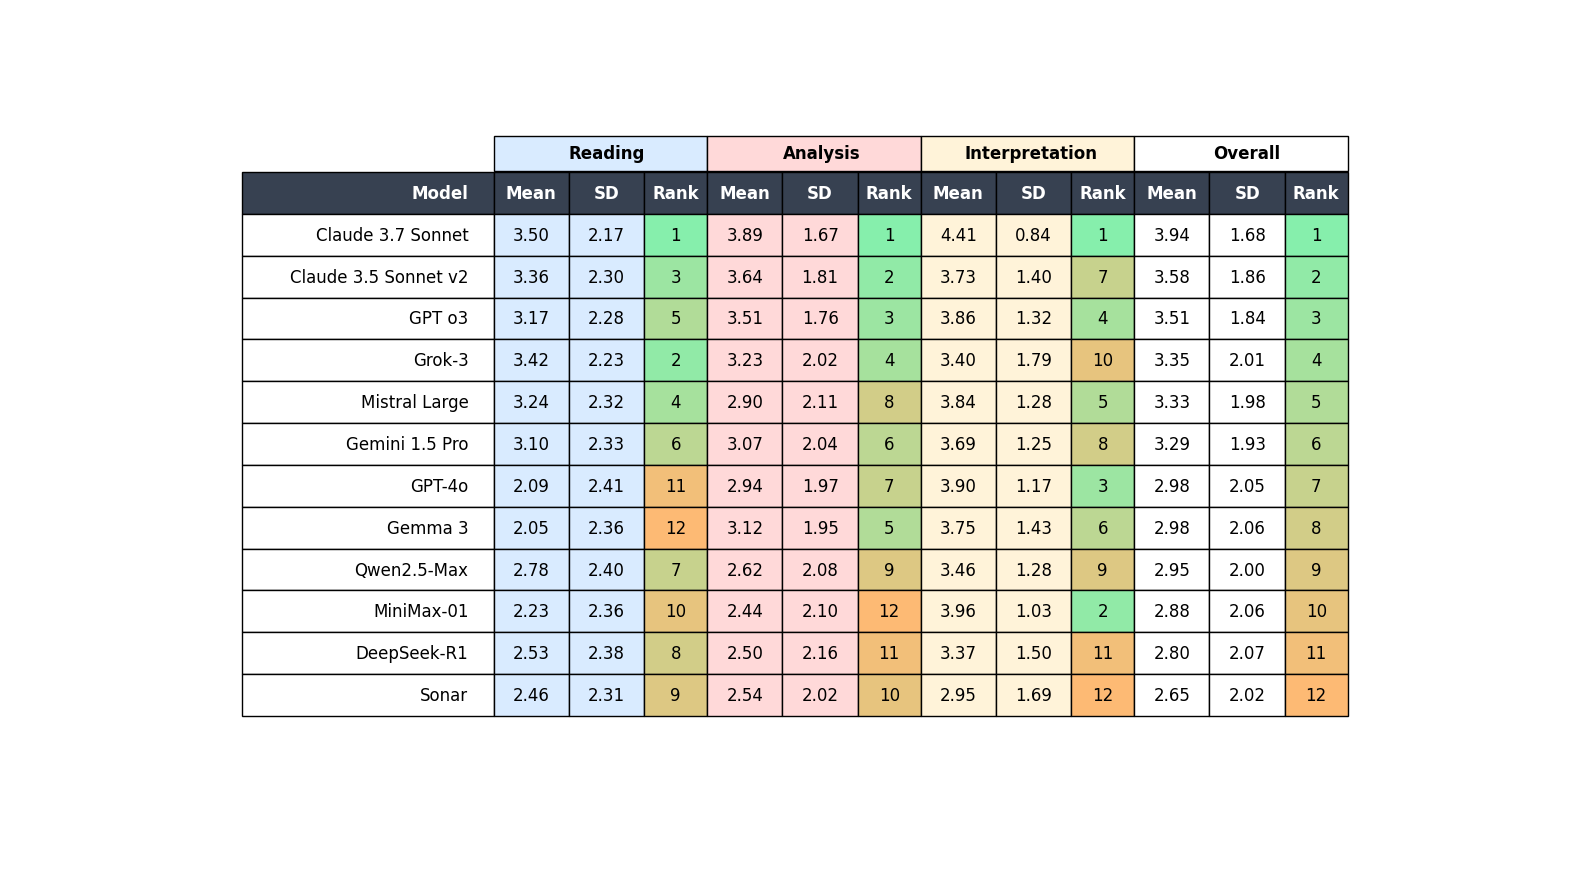

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np

# ==============================
# DATA
# ==============================
data = {
    'Model': [
        'Claude 3.7 Sonnet', 'Claude 3.5 Sonnet v2', 'GPT o3', 'Grok-3',
        'Mistral Large', 'Gemini 1.5 Pro', 'GPT-4o', 'Gemma 3',
        'Qwen2.5-Max', 'MiniMax-01', 'DeepSeek-R1', 'Sonar'
    ],
    'Read_Mean': [3.50, 3.36, 3.17, 3.42, 3.24, 3.10, 2.09, 2.05, 2.78, 2.23, 2.53, 2.46],
    'Read_SD':   [2.17, 2.30, 2.28, 2.23, 2.32, 2.33, 2.41, 2.36, 2.40, 2.36, 2.38, 2.31],
    'Read_Rank': [1, 3, 5, 2, 4, 6, 11, 12, 7, 10, 8, 9],

    'Anal_Mean': [3.89, 3.64, 3.51, 3.23, 2.90, 3.07, 2.94, 3.12, 2.62, 2.44, 2.50, 2.54],
    'Anal_SD':   [1.67, 1.81, 1.76, 2.02, 2.11, 2.04, 1.97, 1.95, 2.08, 2.10, 2.16, 2.02],
    'Anal_Rank': [1, 2, 3, 4, 8, 6, 7, 5, 9, 12, 11, 10],

    'Interp_Mean': [4.41, 3.73, 3.86, 3.40, 3.84, 3.69, 3.90, 3.75, 3.46, 3.96, 3.37, 2.95],
    'Interp_SD':   [0.84, 1.40, 1.32, 1.79, 1.28, 1.25, 1.17, 1.43, 1.28, 1.03, 1.50, 1.69],
    'Interp_Rank': [1, 7, 4, 10, 5, 8, 3, 6, 9, 2, 11, 12],

    'Over_Mean': [3.94, 3.58, 3.51, 3.35, 3.33, 3.29, 2.98, 2.98, 2.95, 2.88, 2.80, 2.65],
    'Over_SD':   [1.68, 1.86, 1.84, 2.01, 1.98, 1.93, 2.05, 2.06, 2.00, 2.06, 2.07, 2.02],
    'Over_Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

df = pd.DataFrame(data)

# ==============================
# COLOR SCALE FUNCTION
# ==============================
def scale_color(rank, min_r, max_r):
    orange = to_rgb('#FDBA74')
    green = to_rgb('#86EFAC')
    if max_r == min_r:
        norm = 0.5
    else:
        norm = (rank - min_r) / (max_r - min_r)
    r = green[0] + norm * (orange[0] - green[0])
    g = green[1] + norm * (orange[1] - green[1])
    b = green[2] + norm * (orange[2] - green[2])

    return (r, g, b)

rank_cols = ['Read_Rank', 'Anal_Rank', 'Interp_Rank', 'Over_Rank']
rank_min = df[rank_cols].min().min()
rank_max = df[rank_cols].max().max()

# ==============================
# BUILD TABLE DATA
# ==============================
table_data = []

for i, row in df.iterrows():
    table_data.append([
        row['Model'],

        f"{row['Read_Mean']:.2f}",
        f"{row['Read_SD']:.2f}",
        row['Read_Rank'],

        f"{row['Anal_Mean']:.2f}",
        f"{row['Anal_SD']:.2f}",
        row['Anal_Rank'],

        f"{row['Interp_Mean']:.2f}",
        f"{row['Interp_SD']:.2f}",
        row['Interp_Rank'],

        f"{row['Over_Mean']:.2f}",
        f"{row['Over_SD']:.2f}",
        row['Over_Rank'],
    ])

columns = [
    'Model',
    'Mean', 'SD', 'Rank',
    'Mean', 'SD', 'Rank',
    'Mean', 'SD', 'Rank',
    'Mean', 'SD', 'Rank',
]

# ==============================
# PLOT
# ==============================
fig, ax = plt.subplots(figsize=(16, 9))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    colLabels=columns,
    loc='center',
    cellLoc='center',
    colWidths=[0.2, 0.06, 0.06, 0.05, 0.06, 0.06, 0.05, 0.06, 0.06, 0.05, 0.06, 0.06, 0.05  ]

)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(0.8, 2)

reading = '#d9ebff'
analysis = '#ffd9d9'
interpretation = '#fff3d9'


# ==============================
# COLORING CELLS BASED ON RANK
# ==============================
for (row, col), cell in table.get_celld().items():

    # Header formatting
    if row == 0:
        cell.set_facecolor('#374151')
        cell.set_text_props(color='white', fontweight='bold')
        if col == 0:
            cell.set_text_props(ha='right')
        continue

    r = row - 1

    if col == 0:
        # adjust text to right
        cell.set_text_props(ha='right')

    if col == 1 or col == 2:
        cell.set_facecolor(reading)

    if col == 4 or col == 5:
        cell.set_facecolor(analysis)

    if col == 7 or col == 8:
        cell.set_facecolor(interpretation)

    if col == 3:
        rank = df.loc[r, 'Read_Rank']
        cell.set_facecolor(scale_color(rank, rank_min, rank_max))

    # Analysis rank
    if col == 6:
        rank = df.loc[r, 'Anal_Rank']
        cell.set_facecolor(scale_color(rank, rank_min, rank_max))

    # Interpretation rank
    if col == 9:
        rank = df.loc[r, 'Interp_Rank']
        cell.set_facecolor(scale_color(rank, rank_min, rank_max))

    # Overall rank
    if col == 12:
        rank = df.loc[r, 'Over_Rank']
        cell.set_facecolor(scale_color(rank, rank_min, rank_max))


from matplotlib.patches import Rectangle

# Funkcja do dodania nagłówka w prostokącie
def add_header(ax, x_center, y_top, width, height, text, facecolor, rectangle):
    # Dodaj prostokąt
    rect = Rectangle(
        rectangle,
        width,
        height,
        facecolor=facecolor,
        edgecolor='black',
        linewidth=1
    )
    ax.add_patch(rect)
    # Dodaj tekst wyśrodkowany w prostokącie
    ax.text(x_center, y_top - height/2, text,
            ha='center', va='center', fontsize=12, fontweight='bold')

# Przykład użycia
y_top = 0.854 # trochę nad tabelą
height = 0.04
widths = [0.136, 0.136, 0.136, 0.136]
x_centers = [0.38, 0.517, 0.65, 0.788]
rectange = [(0.308,0.814), (0.444, 0.814), (0.58,0.814), (0.716,0.814)]
labels = ['Reading', 'Analysis', 'Interpretation', 'Overall']
colors = ['#d9ebff', '#ffd9d9', '#fff3d9', '#ffffff']

for x, w, lbl, col, re in zip(x_centers, widths, labels, colors, rectange):
    add_header(ax, x, y_top, w, height, lbl, col, re)


plt.tight_layout()
plt.savefig('models_performance_table.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()


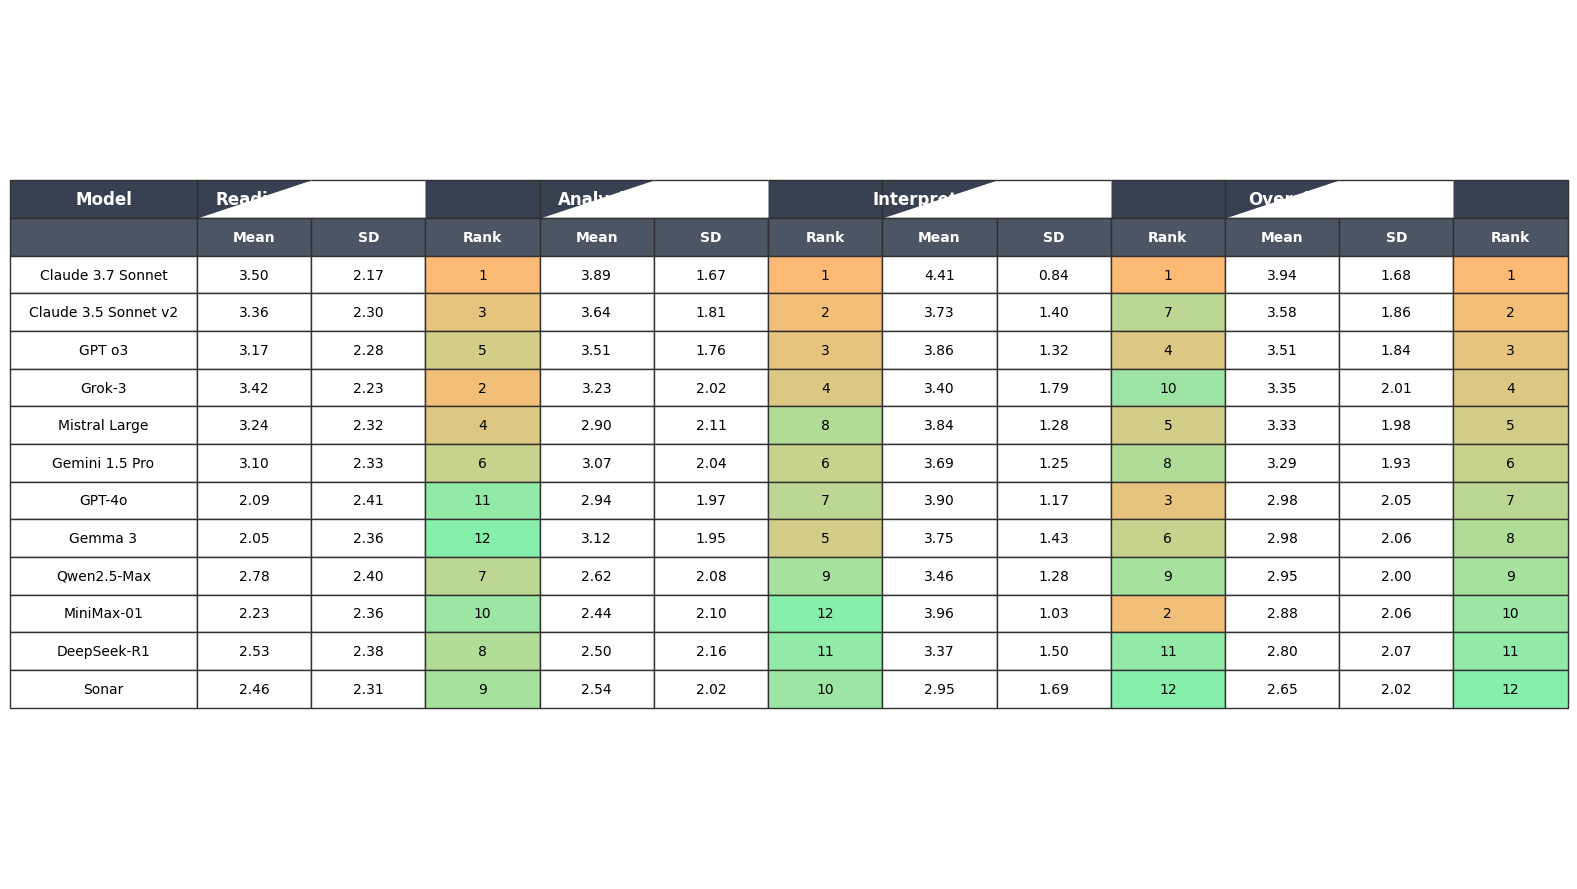

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np

# ==============================
# DATA
# ==============================
data = {
    'Model': [
        'Claude 3.7 Sonnet', 'Claude 3.5 Sonnet v2', 'GPT o3', 'Grok-3',
        'Mistral Large', 'Gemini 1.5 Pro', 'GPT-4o', 'Gemma 3',
        'Qwen2.5-Max', 'MiniMax-01', 'DeepSeek-R1', 'Sonar'
    ],
    'Read_Mean': [3.50, 3.36, 3.17, 3.42, 3.24, 3.10, 2.09, 2.05, 2.78, 2.23, 2.53, 2.46],
    'Read_SD':   [2.17, 2.30, 2.28, 2.23, 2.32, 2.33, 2.41, 2.36, 2.40, 2.36, 2.38, 2.31],
    'Read_Rank': [1, 3, 5, 2, 4, 6, 11, 12, 7, 10, 8, 9],

    'Anal_Mean': [3.89, 3.64, 3.51, 3.23, 2.90, 3.07, 2.94, 3.12, 2.62, 2.44, 2.50, 2.54],
    'Anal_SD':   [1.67, 1.81, 1.76, 2.02, 2.11, 2.04, 1.97, 1.95, 2.08, 2.10, 2.16, 2.02],
    'Anal_Rank': [1, 2, 3, 4, 8, 6, 7, 5, 9, 12, 11, 10],

    'Interp_Mean': [4.41, 3.73, 3.86, 3.40, 3.84, 3.69, 3.90, 3.75, 3.46, 3.96, 3.37, 2.95],
    'Interp_SD':   [0.84, 1.40, 1.32, 1.79, 1.28, 1.25, 1.17, 1.43, 1.28, 1.03, 1.50, 1.69],
    'Interp_Rank': [1, 7, 4, 10, 5, 8, 3, 6, 9, 2, 11, 12],

    'Over_Mean': [3.94, 3.58, 3.51, 3.35, 3.33, 3.29, 2.98, 2.98, 2.95, 2.88, 2.80, 2.65],
    'Over_SD':   [1.68, 1.86, 1.84, 2.01, 1.98, 1.93, 2.05, 2.06, 2.00, 2.06, 2.07, 2.02],
    'Over_Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

df = pd.DataFrame(data)

# ==============================
# COLOR SCALE FUNCTION
# ==============================
def scale_color(rank, min_r, max_r):
    orange = to_rgb('#FDBA74')
    green = to_rgb('#86EFAC')
    if max_r == min_r:
        norm = 0.5
    else:
        norm = (rank - min_r) / (max_r - min_r)
    r = orange[0] + norm * (green[0] - orange[0])
    g = orange[1] + norm * (green[1] - orange[1])
    b = orange[2] + norm * (green[2] - orange[2])
    return (r, g, b)

rank_cols = ['Read_Rank', 'Anal_Rank', 'Interp_Rank', 'Over_Rank']
rank_min = df[rank_cols].min().min()
rank_max = df[rank_cols].max().max()

# ==============================
# BUILD TABLE DATA WITH HIERARCHICAL HEADER
# ==============================
# Top header row: Model | Reading (spanning 3 cols) | Analysis (spanning 3 cols) | etc.
# Text in left column, will appear centered by hiding internal borders
top_header = ['Model', 'Reading', '', '', 'Analysis', '', '', 'Interpretation', '', '', 'Overall', '', '']

# Second header row: Mean/SD/Rank for each category
second_header = ['', 'Mean', 'SD', 'Rank', 'Mean', 'SD', 'Rank', 'Mean', 'SD', 'Rank', 'Mean', 'SD', 'Rank']

# Data rows
table_data = []
for i, row in df.iterrows():
    table_data.append([
        row['Model'],
        f"{row['Read_Mean']:.2f}",
        f"{row['Read_SD']:.2f}",
        row['Read_Rank'],
        f"{row['Anal_Mean']:.2f}",
        f"{row['Anal_SD']:.2f}",
        row['Anal_Rank'],
        f"{row['Interp_Mean']:.2f}",
        f"{row['Interp_SD']:.2f}",
        row['Interp_Rank'],
        f"{row['Over_Mean']:.2f}",
        f"{row['Over_SD']:.2f}",
        row['Over_Rank'],
    ])

# Combine all data: top header, second header, then data rows
all_data = [top_header, second_header] + table_data

# ==============================
# PLOT
# ==============================
fig, ax = plt.subplots(figsize=(16, 9))
ax.axis('off')

# Don't use colLabels, include headers in cellText
# Set column widths: Model, then 3 equal columns for each category
col_widths = [0.12] + [0.0733] * 12  # Model wider, then equal widths for categories
table = ax.table(
    cellText=all_data,
    loc='center',
    cellLoc='center',
    colWidths=col_widths
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.3, 1.8)

# ==============================
# FORMAT HEADERS AND COLOR CELLS
# ==============================
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('#312f2f')
    
    # Top header row (row 0) - main categories
    if row == 0:
        cell.set_facecolor('#374151')
        cell.set_text_props(color='white', fontweight='bold', fontsize=12, ha='center')
        # Hide text and borders for merged cells to create merged appearance
        # Category text is in left columns: 1 (Reading), 4 (Analysis), 7 (Interpretation), 10 (Overall)
        if col in [2, 3, 5, 6, 8, 9, 11, 12]:  # Middle and right cells of each category group
            cell.get_text().set_text('')  # Clear text from merged cells
            # Adjust visible edges to create merged look - hide vertical borders between cells
            if col in [2, 5, 8, 11]:  # Middle cells
                cell.visible_edges = 'TB'  # Only top and bottom (no side borders)
            elif col in [3, 6, 9, 12]:  # Right cells
                cell.visible_edges = 'TBR'  # Top, bottom, right
        elif col in [1, 4, 7, 10]:  # Left cells with category text
            cell.visible_edges = 'TBL'  # Top, bottom, left (no right border to create merge effect)
    
    # Second header row (row 1) - Mean/SD/Rank
    elif row == 1:
        cell.set_facecolor('#4B5563')
        cell.set_text_props(color='white', fontweight='bold', fontsize=10)
        if col == 0:  # Model column
            cell.get_text().set_text('')  # Empty for Model column
    
    # Data rows (row 2+)
    else:
        r = row - 2  # Adjust index for data rows
        
        # Reading rank (col 3)
        if col == 3:
            rank = df.loc[r, 'Read_Rank']
            cell.set_facecolor(scale_color(rank, rank_min, rank_max))
        
        # Analysis rank (col 6)
        elif col == 6:
            rank = df.loc[r, 'Anal_Rank']
            cell.set_facecolor(scale_color(rank, rank_min, rank_max))
        
        # Interpretation rank (col 9)
        elif col == 9:
            rank = df.loc[r, 'Interp_Rank']
            cell.set_facecolor(scale_color(rank, rank_min, rank_max))
        
        # Overall rank (col 12)
        elif col == 12:
            rank = df.loc[r, 'Over_Rank']
            cell.set_facecolor(scale_color(rank, rank_min, rank_max))
        
        # Default formatting for data cells
        cell.set_text_props(fontfamily='sans-serif', fontsize=10)

plt.tight_layout()
plt.savefig('table_models_fixed.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()


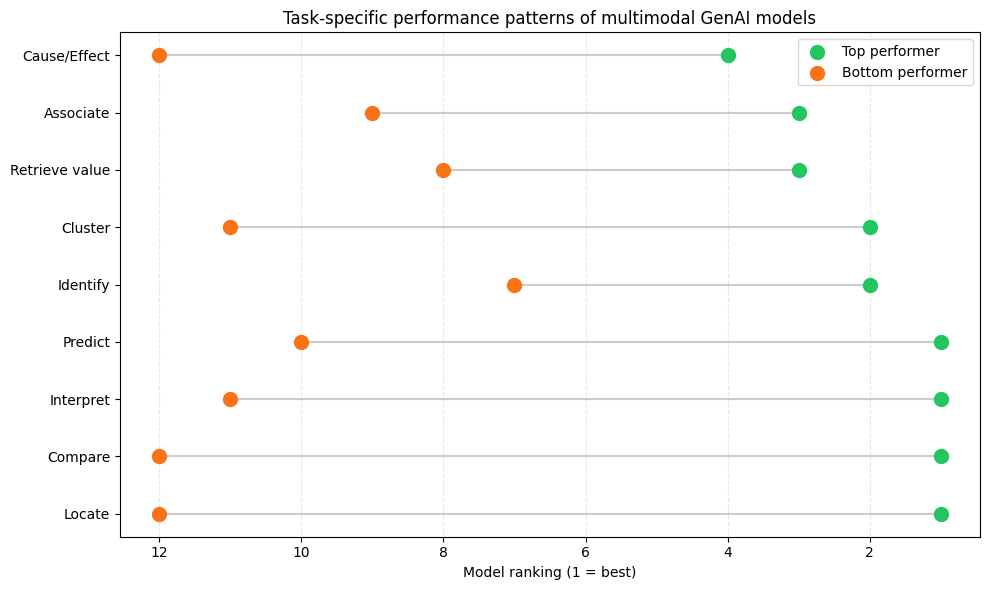

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

# ==============================
# Dane (Task-specific top & bottom performers)
# ==============================
data = [
    # Task, Top performer, Bottom performer
    ("Locate", "Claude 3.7 Sonnet", "Sonar"),
    ("Compare", "Claude 3.7 Sonnet", "Sonar"),
    ("Interpret", "Claude 3.7 Sonnet", "DeepSeek-R1"),
    ("Predict", "Claude 3.7 Sonnet", "Grok-3"),
    ("Identify", "Claude 3.5 Sonnet v2", "GPT-4o"),
    ("Cluster", "Claude 3.5 Sonnet v2", "DeepSeek-R1"),
    ("Retrieve value", "GPT o3", "Gemma 3"),
    ("Associate", "GPT o3", "Qwen2.5-Max"),
    ("Cause/Effect", "MiniMax-01", "Sonar")
]

df = pd.DataFrame(data, columns=["Task", "Top", "Bottom"])

# ==============================
# Przypisz ranking dla wizualizacji (przykładowe wartości X)
# ==============================
# Możemy przypisać arbitralne wartości X do top/bottom, aby je pokazać
rank_dict = {
    "Claude 3.7 Sonnet": 1,
    "Claude 3.5 Sonnet v2": 2,
    "GPT o3": 3,
    "MiniMax-01": 4,
    "Sonar": 12,
    "DeepSeek-R1": 11,
    "Qwen2.5-Max": 9,
    "Gemma 3": 8,
    "GPT-4o": 7,
    "Grok-3": 10
}

df["Top_val"] = df["Top"].map(rank_dict)
df["Bottom_val"] = df["Bottom"].map(rank_dict)

# ==============================
# Tworzenie dumbbell plot
# ==============================
fig, ax = plt.subplots(figsize=(10, 6))

# Linie łączące top i bottom
for idx, row in df.iterrows():
    ax.plot([row["Top_val"], row["Bottom_val"]], [row["Task"], row["Task"]], color="#cccccc", zorder=1)

# Punkty top performer
ax.scatter(df["Top_val"], df["Task"], color="#22c55e", s=100, label="Top performer", zorder=2)
# Punkty bottom performer
ax.scatter(df["Bottom_val"], df["Task"], color="#f97316", s=100, label="Bottom performer", zorder=3)

# Oś X – odwrócona, bo 1 = najlepszy
ax.invert_xaxis()

# Dodatki estetyczne
ax.set_xlabel("Model ranking (1 = best)")
ax.set_title("Task-specific performance patterns of multimodal GenAI models")
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()
